In [142]:
import numpy as np
import skimage.io
import skimage.viewer 
import matplotlib.pyplot as plt
import ipympl
from PIL import Image
from scipy import ndimage as ndi

### Read Image

In [143]:
%matplotlib inline
img = skimage.io.imread(fname="MyPic.jpeg")

### Image in gray colors

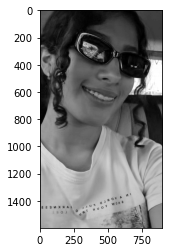

In [159]:
image = img[:,:,1]
w, h = image.shape
plt.imshow(image, cmap="gray")

### Create Identity Matrix

In [145]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
image1 = ndi.affine_transform(image, mat_identity) # apply affine transformation to the identity matrix

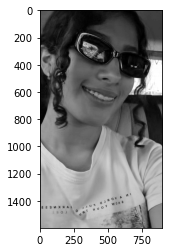

In [160]:
%matplotlib inline
plt.imshow(image1, cmap="gray") # original imagen with original identity matrix.

### Scale

In [147]:
def scale(s_x, s_y):
    mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]]) #scale image matrix in x and y.
    return ndi.affine_transform(image, mat_scale) # apply affine transformation to it.

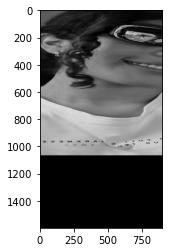

In [164]:
%matplotlib inline
plt.imshow(scale(1.5,0.5), cmap="gray")

### Reflect

In [207]:
def reflect(img):
    mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,w/2],[0,1,-h],[0,0,1]])
    return ndi.affine_transform(img, mat_reflect) # offset=(0,h)

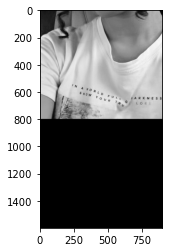

In [208]:
%matplotlib inline
plt.imshow(reflect(image), cmap="gray")

### Rotate
##### Theta is the one who manages how much we want to rotate our image

In [209]:
def rotate(img, theta):
    mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
    return ndi.affine_transform(image, mat_rotate)

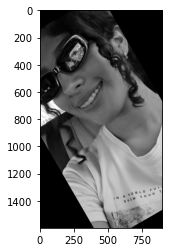

In [222]:
%matplotlib inline
plt.imshow(rotate(img, np.pi/6), cmap="gray")

### Shear
##### Lambda tells us how much we want to shear our image

In [225]:
def shear(img, lambda1):
    mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]]) # identity matrix with lambda modifier.
    return ndi.affine_transform(image, mat_shear)

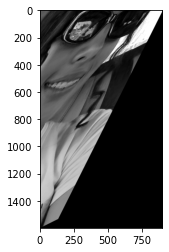

In [224]:
%matplotlib inline
plt.imshow(shear(img, 0.5), cmap="gray")

### Warp
##### We select our points of interest and projection matrix and apply the transform.warp function from skimage.

    estimate_transform(ttype, src, dst)
        - ttype: 
         {‘euclidean’,similarity’,‘affine’,‘piecewise-affine’,‘projective’,‘polynomial’}
        - src: points of interest
        - dst: projection

(1599, 899, 3)


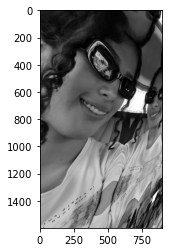

In [227]:
from skimage import transform

def warp(img, points_of_interest, proyection):
    tform = transform.estimate_transform('projective', points_of_interest, projection)
    return transform.warp(image, tform.inverse, mode = 'symmetric')


%matplotlib inline
points_of_interest = np.array([[360, 110], 
                               [420, 270], 
                               [130, 400], 
                               [100, 280]])

projection = np.array([[500, 200],
                       [500, 390],
                       [100, 390],
                       [100, 200]])
plt.imshow(warp(img, points_of_interest, projection), cmap="gray")